Dataset Preview:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

Centroid of Class 0: [2.09444506e-02 5.01114687e-03 8.77858462e-03 5.08277872e-03
 3.21297342e-03 3.10527675e-02 8.61217223e-03 9.32397564e-03
 6.77146075e-03 1.36757661e-02 1.29990393e-02 8.28878342e-02
 2.72348340e-03 2.01566928e-03 4.65310976e-03 4.22488436e-03
 3.47540364e-03 2.96350580e-02 4.34017571e-03 1.74628049e-02
 3.93832191e-03 3.07293782e-02 1.33544793e-02 6.89583404e-03
 2.57687090e-02 2.04320677e-02 1.02847390e-02 4.58249051e-03
 2.68502559e-02 3.13015364e-03 5.04348857e-03 4.30151332e-03
 2.51677695e-03 5.63555983e-03 1.05349074

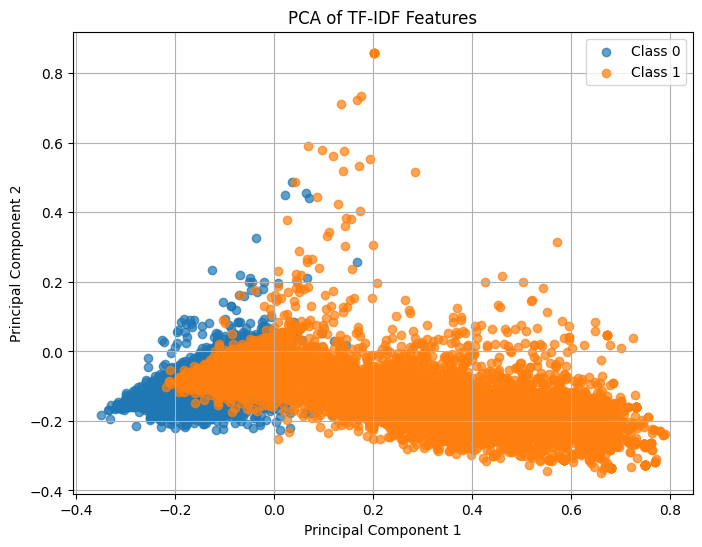

In [8]:
#A1
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Encode the class labels
label_column = 'cyberbullying_type'
data[label_column] = LabelEncoder().fit_transform(data[label_column])

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)  # You can adjust max_features
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Combine features and labels
data_with_features = pd.DataFrame(features)
data_with_features[label_column] = data[label_column]

# Separate the data based on class labels
class_0_data = data_with_features[data_with_features[label_column] == 0].drop(columns=[label_column]).values
class_1_data = data_with_features[data_with_features[label_column] == 1].drop(columns=[label_column]).values

# Compute centroids (mean vectors)
centroid_0 = np.mean(class_0_data, axis=0)
centroid_1 = np.mean(class_1_data, axis=0)

# Compute standard deviation (spread) for each class
std_dev_0 = np.std(class_0_data, axis=0)
std_dev_1 = np.std(class_1_data, axis=0)

# Compute Euclidean distance between centroids
distance_between_centroids = np.linalg.norm(centroid_0 - centroid_1)

# Print results
print("\nCentroid of Class 0:", centroid_0)
print("Centroid of Class 1:", centroid_1)
print("\nStandard Deviation of Class 0:", std_dev_0)
print("Standard Deviation of Class 1:", std_dev_1)
print("\nEuclidean Distance between Class 0 and Class 1 Centroids:", distance_between_centroids)

# Optionally visualize with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_data[data[label_column] == 0, 0], reduced_data[data[label_column] == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(reduced_data[data[label_column] == 1, 0], reduced_data[data[label_column] == 1, 1], label='Class 1', alpha=0.7)
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


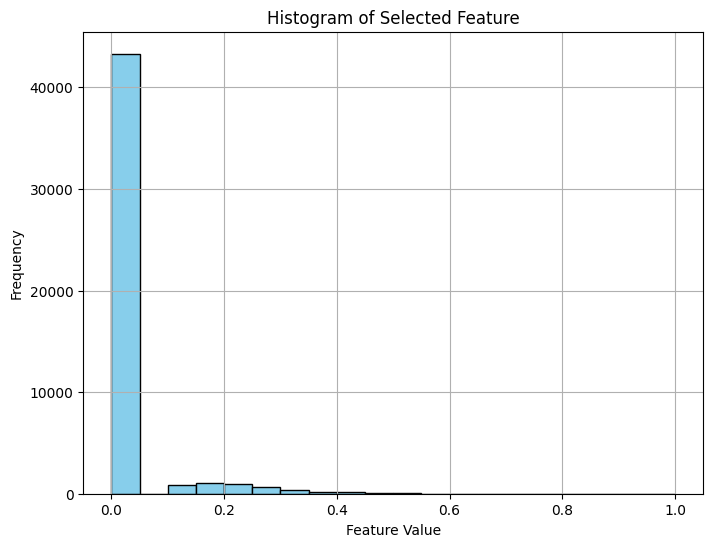

Mean of the selected feature: 0.02097827304322972
Variance of the selected feature: 0.005123328452291526


In [12]:
#A2
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)  # You can adjust max_features
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Select a specific feature for analysis, e.g., the first feature
selected_feature = features[:, 0]  # Select the first feature (you can choose any index)

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(selected_feature, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Selected Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the mean and variance of the selected feature
mean_value = np.mean(selected_feature)
variance_value = np.var(selected_feature)

print(f"Mean of the selected feature: {mean_value}")
print(f"Variance of the selected feature: {variance_value}")


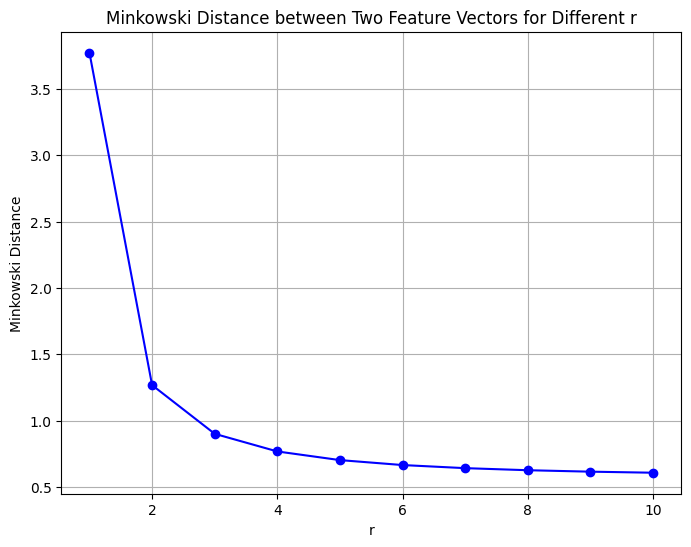

In [7]:
#A3
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import minkowski
import matplotlib.pyplot as plt

# Load the dataset
file_path =r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Select any two feature vectors (e.g., first two vectors)
vector_1 = features[0]  # First tweet's TF-IDF vector
vector_2 = features[1]  # Second tweet's TF-IDF vector

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = []

for r in r_values:
    distance = minkowski(vector_1, vector_2, p=r)
    distances.append(distance)

# Plot the distances
plt.figure(figsize=(8, 6))
plt.plot(r_values, distances, marker='o', color='b')
plt.title('Minkowski Distance between Two Feature Vectors for Different r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()


In [10]:
#A4
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Check the distribution of the classes
print("Class Distribution Before Filtering:")
print(data['cyberbullying_type'].value_counts())

# Encode the class labels to numeric form
label_column = 'cyberbullying_type'
label_encoder = LabelEncoder()
data[label_column] = label_encoder.fit_transform(data[label_column])

# If the dataset has more than two classes, filter to only include two
# For example, if you want to include only class 0 and class 1:
filtered_data = data[data[label_column].isin([0, 1])]

# Alternatively, you can choose any two classes by label names and encode them:
# filtered_data = data[data['cyberbullying_type'].isin(['class_name_1', 'class_name_2'])]

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)
X = tfidf.fit_transform(filtered_data['tweet_text']).toarray()
y = filtered_data[label_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shapes of the resulting datasets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Feature vector size: {X_train.shape[1]} features")

# Check class distribution in the training and test sets
print("\nClass distribution in the training set:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in the test set:")
print(pd.Series(y_test).value_counts())


Class Distribution Before Filtering:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64
Training set size: 11167 samples
Test set size: 4786 samples
Feature vector size: 300 features

Class distribution in the training set:
cyberbullying_type
0    5589
1    5578
Name: count, dtype: int64

Class distribution in the test set:
cyberbullying_type
0    2403
1    2383
Name: count, dtype: int64


In [11]:
#A5
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume X_train, X_test, y_train, y_test are already obtained from the previous train-test split

# Initialize the kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy of kNN classifier: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy of kNN classifier: 0.7511

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.52      0.68      2403
           1       0.67      0.99      0.80      2383

    accuracy                           0.75      4786
   macro avg       0.82      0.75      0.74      4786
weighted avg       0.82      0.75      0.74      4786


Confusion Matrix:
[[1238 1165]
 [  26 2357]]


Dataset Preview:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

kNN Classifier Accuracy: 0.6039417129678163


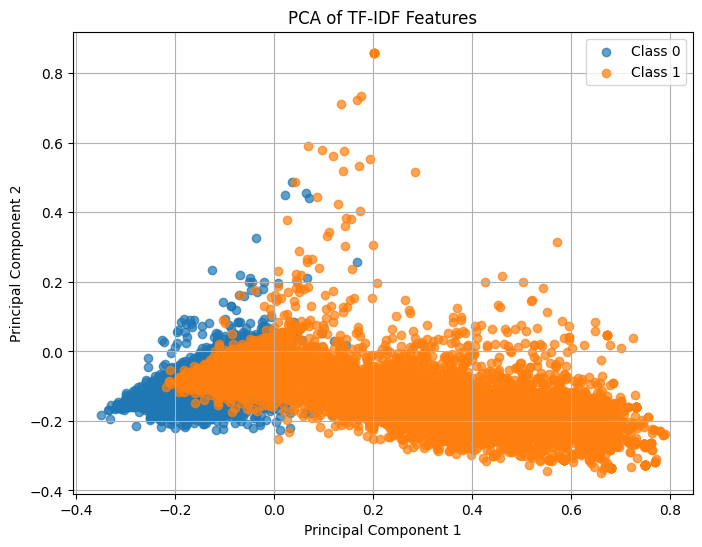

In [13]:
#A6

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Encode the class labels
label_column = 'cyberbullying_type'
data[label_column] = LabelEncoder().fit_transform(data[label_column])

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)  # You can adjust max_features
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[label_column], test_size=0.2, random_state=42)

# Initialize the kNN classifier
neigh = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
neigh.fit(X_train, y_train)

# Test the accuracy of the kNN classifier
accuracy = neigh.score(X_test, y_test)
print("\nkNN Classifier Accuracy:", accuracy)

# Optionally visualize with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[data[label_column] == 0, 0], reduced_data[data[label_column] == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(reduced_data[data[label_column] == 1, 0], reduced_data[data[label_column] == 1, 1], label='Class 1', alpha=0.7)
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Dataset Preview:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

Predicted Class Labels for Test Set:
[1 2 3 ... 3 3 3]

Actual Class Labels:
[1 2 1 ... 0 1 4]

kNN Classifier Accuracy: 0.6039417129678163


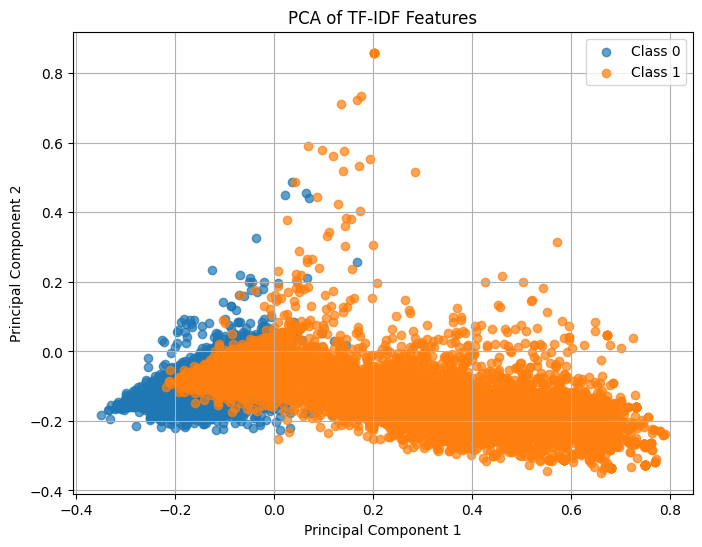

In [14]:
#A7

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Encode the class labels
label_column = 'cyberbullying_type'
data[label_column] = LabelEncoder().fit_transform(data[label_column])

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)  # You can adjust max_features
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[label_column], test_size=0.2, random_state=42)

# Initialize the kNN classifier
neigh = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
neigh.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = neigh.predict(X_test)

# Display the predicted class labels
print("\nPredicted Class Labels for Test Set:")
print(y_pred)

# Compare the predicted labels with actual labels
print("\nActual Class Labels:")
print(y_test.values)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nkNN Classifier Accuracy:", accuracy)

# Optionally visualize with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[data[label_column] == 0, 0], reduced_data[data[label_column] == 0, 1], label='Class 0', alpha=0.7)
plt.scatter(reduced_data[data[label_column] == 1, 0], reduced_data[data[label_column] == 1, 1], label='Class 1', alpha=0.7)
plt.title('PCA of TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Dataset Preview:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
k = 1, Accuracy = 0.6114896739700179
k = 2, Accuracy = 0.5987000733829542
k = 3, Accuracy = 0.6088688541775867
k = 4, Accuracy = 0.5946115945067617
k = 5, Accuracy = 0.6039417129678163
k = 6, Accuracy = 0.586120138379285
k = 7, Accuracy = 0.5731208722088269
k = 8, Accuracy = 0.5642100849145613
k = 9, Accuracy = 0.5569766222874515
k = 10, Accuracy = 0.5530978089946536
k = 11, Accuracy = 0.5518398154942866


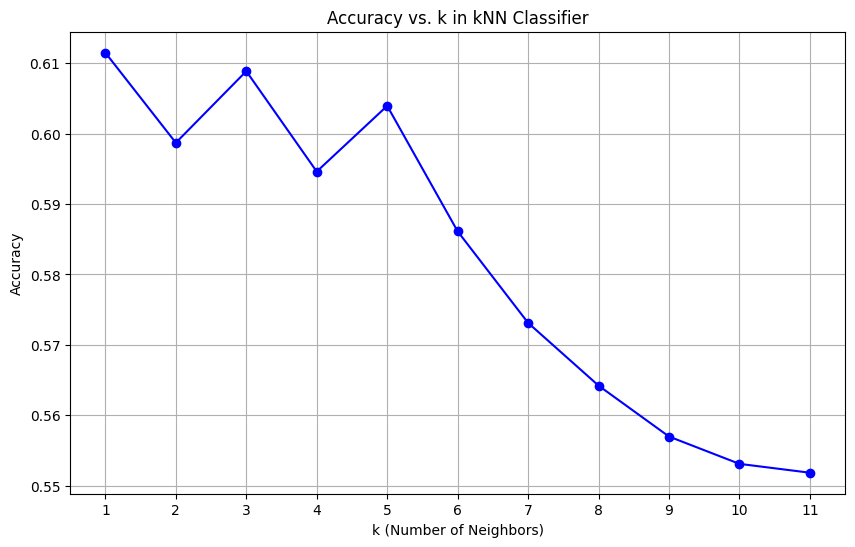

In [15]:
#A8

# Load the dataset
file_path = r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Encode the class labels
label_column = 'cyberbullying_type'
data[label_column] = LabelEncoder().fit_transform(data[label_column])

# Convert the tweet text to TF-IDF features
tfidf = TfidfVectorizer(max_features=300)  # You can adjust max_features
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[label_column], test_size=0.2, random_state=42)

# Initialize lists to store accuracy values for different k
k_values = list(range(1, 12))
accuracies = []

# Iterate over different values of k
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"k = {k}, Accuracy = {accuracy}")

# Plot the accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k in kNN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Dataset loaded successfully.

Confusion Matrix (Training Data):
[[6140    4   11  109  118    7]
 [  49 6180    7   61   57    4]
 [  94   68 5669  368  228   15]
 [ 164   86  429 4603  976   63]
 [ 179  129  516 1301 4062   24]
 [  84   50  187 1504  138 4469]]

Confusion Matrix (Test Data):
[[1198    7   18  296   80    4]
 [  21 1298   17  218   45    4]
 [  22   27 1003  345  126    8]
 [  69   36  178  898  419   24]
 [  71   40  188  699  598   16]
 [  40   28   69  515  101  813]]


NameError: name 'sns' is not defined

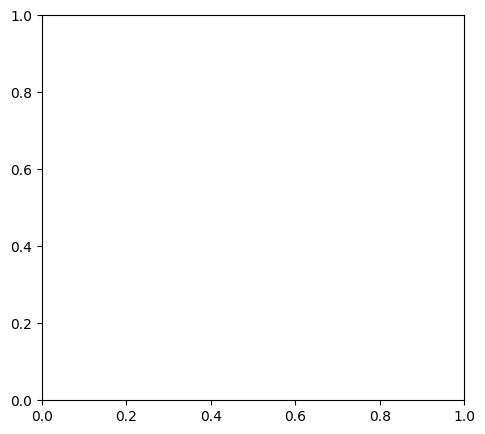

In [18]:


# Load the dataset
file_path =r"C:\Users\Vedha Pranava\Desktop\ml_1\cyberbullying_tweets.csv"
try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at the path {file_path}")
    exit()

# Encode the class labels
label_column = 'cyberbullying_type'
if label_column not in data.columns:
    print(f"Error: The specified label column '{label_column}' does not exist in the dataset.")
    exit()

data[label_column] = LabelEncoder().fit_transform(data[label_column])

# Convert the tweet text to TF-IDF features
if 'tweet_text' not in data.columns:
    print("Error: The 'tweet_text' column does not exist in the dataset.")
    exit()

tfidf = TfidfVectorizer(max_features=300)
features = tfidf.fit_transform(data['tweet_text']).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[label_column], test_size=0.2, random_state=42)

# Initialize kNN classifier
k = 3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Confusion Matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Data):")
print(train_cm)

# Confusion Matrix for test data
test_cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Data):")
print(test_cm)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# Performance Metrics for Training Data
print("\nPerformance Metrics (Training Data):")
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1-Score: {train_f1:.2f}")

# Performance Metrics for Test Data
print("\nPerformance Metrics (Test Data):")
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1-Score: {test_f1:.2f}")

# Detailed classification report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Infer model performance
if train_f1 > test_f1:
    print("\nThe model might be overfitting the training data.")
elif train_f1 < test_f1:
    print("\nThe model might be underfitting the training data.")
else:
    print("\nThe model seems to have a good fit (regular fit).")
